# Import Modules

In [1]:
import cv2
import skimage.util
import matplotlib.pyplot as plt

from matplotlib import image

# Initialize and load original image

In [2]:
raw_image = cv2.imread('../images/lenna.png')
# raw_image = cv2.imread('../images/cameraman.png')
# raw_image = cv2.imread('../images/edin_castle.png')
# raw_image = cv2.imread('../images/bowl_fruit.png')
# raw_image = cv2.imread('../images/peppers.png')
# raw_image = cv2.imread('../images/map_of_spain.png')

img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# Image Description

In [3]:
height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

Height        : 1729 pixels
Width         : 1921 pixels
Color channel : 3 (RGB)


# Display original image

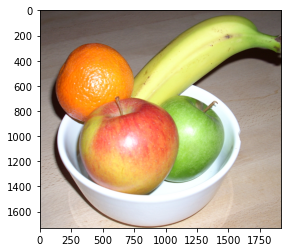

In [4]:
plt.imshow(img_rgb)
plt.show()

# Display original image histogram

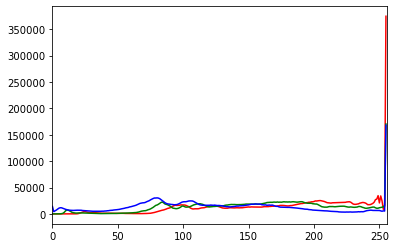

In [5]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rgb], 
                         [i], None,
                         [256],
                         [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()

# Show array value each pixel

In [6]:
img_rgb

array([[[ 77,  66,  62],
        [ 75,  64,  60],
        [ 74,  63,  59],
        ...,
        [ 82,  75,  69],
        [ 83,  76,  70],
        [ 84,  75,  70]],

       [[ 75,  64,  60],
        [ 74,  63,  59],
        [ 75,  64,  60],
        ...,
        [ 82,  75,  69],
        [ 83,  76,  70],
        [ 87,  78,  73]],

       [[ 75,  64,  60],
        [ 75,  64,  60],
        [ 76,  65,  61],
        ...,
        [ 82,  77,  71],
        [ 81,  76,  70],
        [ 84,  77,  71]],

       ...,

       [[187, 174, 168],
        [193, 180, 174],
        [194, 181, 175],
        ...,
        [186, 165, 144],
        [188, 167, 146],
        [189, 166, 148]],

       [[185, 172, 166],
        [194, 181, 175],
        [196, 182, 179],
        ...,
        [187, 165, 144],
        [188, 166, 145],
        [189, 167, 146]],

       [[193, 182, 176],
        [195, 184, 178],
        [195, 184, 180],
        ...,
        [188, 165, 147],
        [188, 165, 147],
        [188, 167, 148]]

# Negative Image

#### - Get height and width of the image

In [7]:
height, width, color_channel = img_rgb.shape
print(f'Height : {height} pixels')
print(f'Width  : {width} pixels')

Height : 1729 pixels
Width  : 1921 pixels


#### - Change value each pixel with algorithm

- <b>Method-1</b>

In [19]:
# img_negative = img_rgb

# for i in range(0, height - 1): 
#     for j in range(0, width - 1):
#         # Get the pixel value 
#         pixel = img_negative[i, j]

#         # Negate each channel by  
#         # subtracting it from 255

#         # 1st index contains red pixel
#         pixel[0] = 255 - pixel[0]
          
#         # 2nd index contains green pixel
#         pixel[1] = 255 - pixel[1]
          
#         # 3rd index contains blue pixel
#         pixel[2] = 255 - pixel[2] 
          
#         # Store new values in the pixel
#         img_negative[i, j] = pixel

- <b>Method 2 (Optimization)<b>

In [9]:
img_negative = 255 - img_rgb

#### - Show array value each pixel

In [10]:
img_negative

array([[[178, 189, 193],
        [180, 191, 195],
        [181, 192, 196],
        ...,
        [173, 180, 186],
        [172, 179, 185],
        [171, 180, 185]],

       [[180, 191, 195],
        [181, 192, 196],
        [180, 191, 195],
        ...,
        [173, 180, 186],
        [172, 179, 185],
        [168, 177, 182]],

       [[180, 191, 195],
        [180, 191, 195],
        [179, 190, 194],
        ...,
        [173, 178, 184],
        [174, 179, 185],
        [171, 178, 184]],

       ...,

       [[ 68,  81,  87],
        [ 62,  75,  81],
        [ 61,  74,  80],
        ...,
        [ 69,  90, 111],
        [ 67,  88, 109],
        [ 66,  89, 107]],

       [[ 70,  83,  89],
        [ 61,  74,  80],
        [ 59,  73,  76],
        ...,
        [ 68,  90, 111],
        [ 67,  89, 110],
        [ 66,  88, 109]],

       [[ 62,  73,  79],
        [ 60,  71,  77],
        [ 60,  71,  75],
        ...,
        [ 67,  90, 108],
        [ 67,  90, 108],
        [ 67,  88, 107]]

#### - Display the negative transformed image

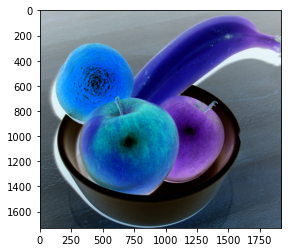

In [11]:
plt.imshow(img_negative) 
plt.show()

#### - Histogram

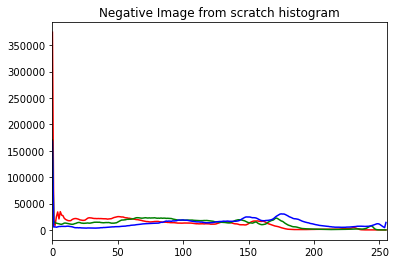

In [22]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_negative], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image from scratch histogram')
plt.show()

# With image processing module

### - Initialize and load original image

In [13]:
img_raw = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

### - Display original image

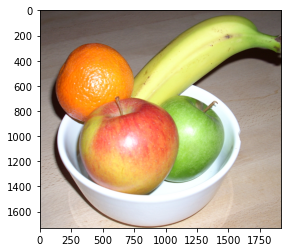

In [14]:
plt.imshow(img_raw)
plt.show()

### - Negative image with scikit-image module

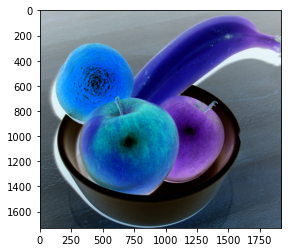

In [15]:
plt.imshow(skimage.util.invert(img_raw))
plt.show()

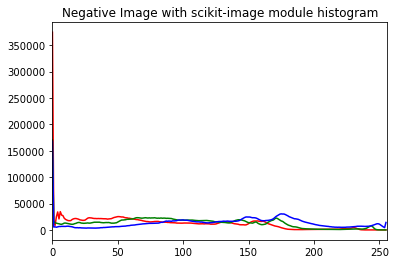

In [20]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([skimage.util.invert(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title('Negative Image with scikit-image module histogram')
plt.show()

### - Negative image with Open CV

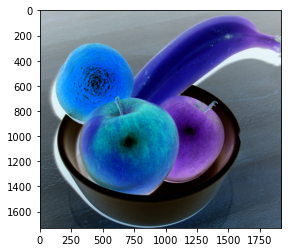

In [17]:
plt.imshow(cv2.bitwise_not(img_raw))
plt.show()

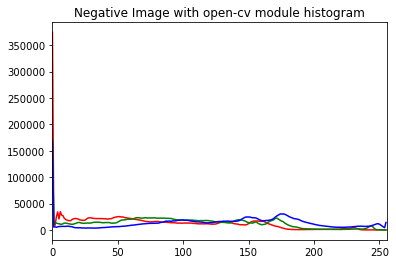

In [21]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([cv2.bitwise_not(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with open-cv module histogram')
plt.show()